In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('/home/ahmed/Downloads/201902-fordgobike-tripdata.csv')
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
23668,674,2019-02-25 19:40:34.6710,2019-02-25 19:51:49.5950,355.0,23rd St at Tennessee St,37.755367,-122.388795,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5250,Subscriber,1994.0,Male,No
84036,799,2019-02-17 19:03:00.4090,2019-02-17 19:16:20.2810,245.0,Downtown Berkeley BART,37.870139,-122.268422,265.0,Ninth St at Parker St,37.858868,-122.291209,6416,Subscriber,1983.0,Male,No
17818,492,2019-02-26 20:29:34.3790,2019-02-26 20:37:46.9190,281.0,9th St at San Fernando St,37.338395,-121.880797,305.0,Ryland Park,37.342725,-121.895617,5714,Subscriber,1999.0,Male,Yes
86170,394,2019-02-17 13:28:23.2430,2019-02-17 13:34:57.2550,341.0,Fountain Alley at S 2nd St,37.336188,-121.889277,290.0,George St at 1st St,37.347732,-121.899464,5904,Subscriber,1995.0,Male,Yes
94691,384,2019-02-15 16:02:12.4390,2019-02-15 16:08:36.6320,80.0,Townsend St at 5th St,37.775235,-122.397437,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6565,Subscriber,1988.0,Female,No


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
bin_edges = [60,315,487,726,1461]
bin_names = ['Short','Medium','Long','Very Long']
df['duration_class'] = pd.cut(df['duration_sec'], bin_edges, labels=bin_names)

In [10]:
sum(df.start_station_id - df.end_station_id == 0)

3458

In [11]:
df.member_birth_year = 2019 - df.member_birth_year
df.member_birth_year

0         35.0
2         47.0
3         30.0
4         45.0
5         60.0
          ... 
183407    23.0
183408    35.0
183409    29.0
183410    31.0
183411    30.0
Name: member_birth_year, Length: 174952, dtype: float64

In [12]:
df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [13]:
df.drop(df[df['member_gender'] == 'Other'].index,inplace=True)

Since nobody would start and end at the same point then we should drop those rows

In [14]:
df.drop(df[df['start_station_name'] == df['end_station_name']].index,inplace=True)

Dealing with outliers over the numerical values throughout our dataset columns that matter is important, so let's start truncating outliers

First lets find out the InterQuartile Range (IQR) of each column

In [15]:
duration_iqr = df.duration_sec.quantile(0.75) - df.duration_sec.quantile(0.25)
birth_year_iqr = df.member_birth_year.quantile(0.75) - df.member_birth_year.quantile(0.25)

Now let's drop any row that is more than Q3+1.5(IQR) or less than Q1-1.5(IQR)

In [16]:
df.drop(df[df['duration_sec'] < (df['duration_sec'].quantile(0.25) - duration_iqr*1.5)].index,inplace=True)
df.drop(df[df['duration_sec'] > (df['duration_sec'].quantile(0.75) + duration_iqr*1.5)].index,inplace=True)
df.drop(df[df['member_birth_year'] < (df['member_birth_year'].quantile(0.25) - duration_iqr*1.5)].index,inplace=True)
df.drop(df[df['member_birth_year'] > (df['member_birth_year'].quantile(0.75) + duration_iqr*1.5)].index,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159727 entries, 6 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             159727 non-null  int64   
 1   start_time               159727 non-null  object  
 2   end_time                 159727 non-null  object  
 3   start_station_id         159727 non-null  float64 
 4   start_station_name       159727 non-null  object  
 5   start_station_latitude   159727 non-null  float64 
 6   start_station_longitude  159727 non-null  float64 
 7   end_station_id           159727 non-null  float64 
 8   end_station_name         159727 non-null  object  
 9   end_station_latitude     159727 non-null  float64 
 10  end_station_longitude    159727 non-null  float64 
 11  bike_id                  159727 non-null  int64   
 12  user_type                159727 non-null  object  
 13  member_birth_year        159727 non-null  fl

Verifying these data has been cleaned of outliers

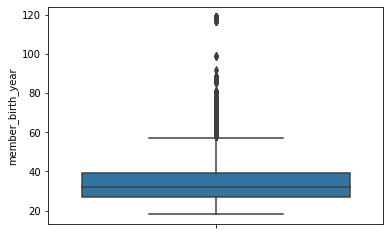

In [17]:
sb.boxplot(data = df, y = 'member_birth_year');

In [18]:
max(df.member_birth_year)

119.0

Looks like it wasn't cleaned well so we will have to drop ages over 80

In [19]:
df.drop(df[df['member_birth_year'] > 80].index,inplace=True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_class
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,36.0,Female,No,Very Long
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,27.0,Male,No,Very Long
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,23.0,Female,Yes,Medium
11,506,2019-02-28 23:56:55.5400,2019-03-01 00:05:21.7330,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,26.0,Male,No,Long
12,1176,2019-02-28 23:45:12.6510,2019-03-01 00:04:49.1840,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,-122.405950,5328,Customer,29.0,Male,No,Very Long


In [20]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [21]:
df.to_csv('CleanBikeShare.csv')

# Questions to be asked from now over 
1. What are the most crowded stations in terms of start and end stations in bikeshare?
2. what conditions are affected by subscription?
3. Who're the most subscribers?
4. What are the peak times of bikeshare?
5. Is there any factor that affects a Simpson-Paradox throughout these times?!!
6. Which ages share bikes the most?
7. Are subscriptions affected by either of gender or age?
8. Why some users may not use bikeshare for their whole trip?
9. What is the most appearing round trip?
10. Is age a factor affecting share duration?
11. What ages affect bikeshare for all trip?
12. Is bikeshare over all trip affected by duration?

## Starting Data Exploration

### Univariante Exploration

#### What are the most crowded stations in terms of start and end stations in bikeshare?

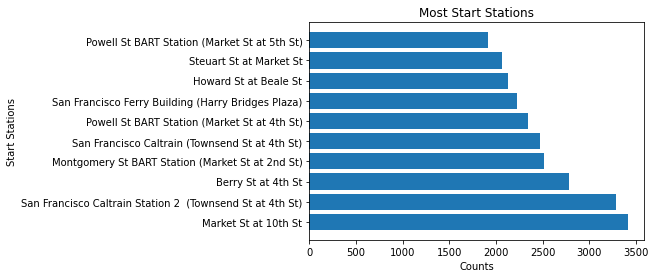

In [22]:
plt.title("Most Start Stations")
plt.xlabel('Counts')
plt.ylabel('Start Stations')
plt.barh(df.start_station_name.value_counts().index[:10], df.start_station_name.value_counts()[:10]);

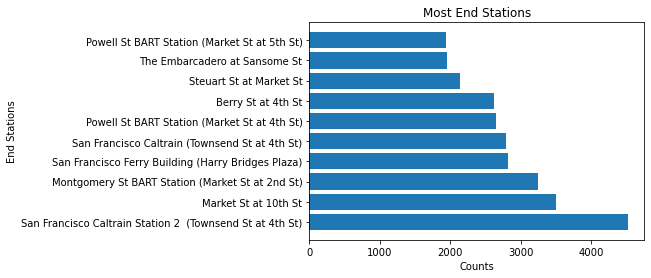

In [23]:
plt.title("Most End Stations")
plt.xlabel('Counts')
plt.ylabel('End Stations')
plt.barh(df.end_station_name.value_counts().index[:10], df.end_station_name.value_counts()[:10]);

Here We can see that Most people start bikesharing at the market street, also most people tend to go to San Francisco Caltrain Station 2. 

In [24]:
df['start_end'] = df['start_station_name'] + ' to ' + df['end_station_name']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_class,start_end
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,36.0,Female,No,Very Long,Palm St at Willow St to San Jose Diridon Station
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,27.0,Male,No,Very Long,Post St at Kearny St to Mission Playground
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,23.0,Female,Yes,Medium,Jones St at Post St to San Francisco Public Li...
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,26.0,Male,No,Long,Civic Center/UN Plaza BART Station (Market St ...
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,-122.405950,5328,Customer,29.0,Male,No,Very Long,Valencia St at 21st St to Broadway at Kearny


#### What is the most appearing round trip?

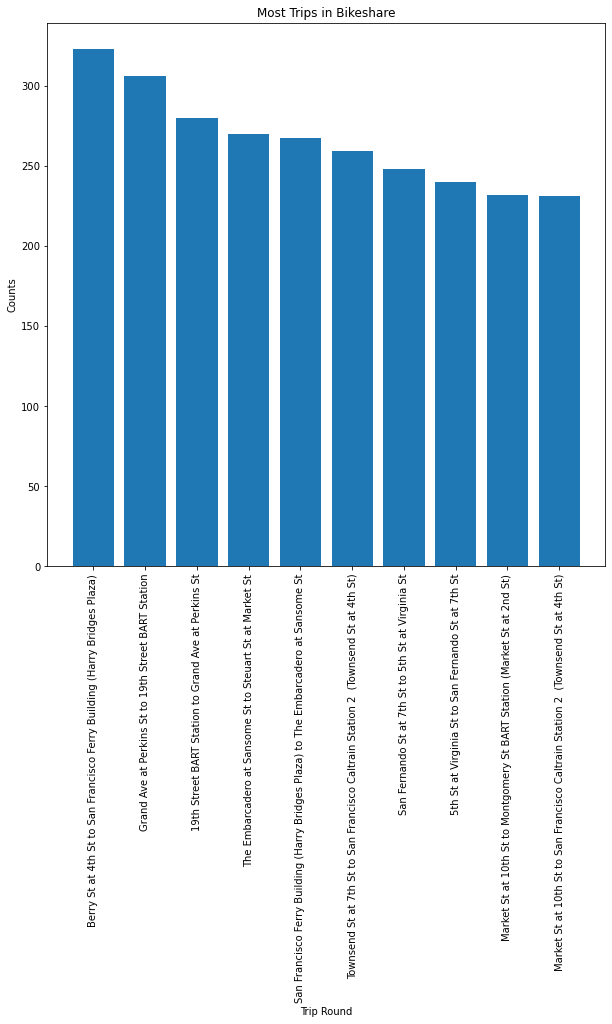

In [25]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.bar(df.start_end.value_counts().index[:10],df.start_end.value_counts()[:10]);
plt.xlabel('Trip Round')
plt.ylabel('Counts')
plt.title('Most Trips in Bikeshare');

#### Which ages share bikes the most?

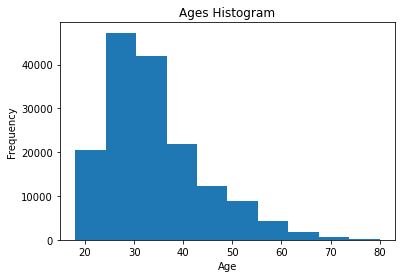

In [26]:
plt.hist(data = df, x = 'member_birth_year', bins = 10);
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Ages Histogram");

Looks like most of bikesharers are of age 30 whereas our data set is a bit skewed 

#### What are the peak times of bikeshare?

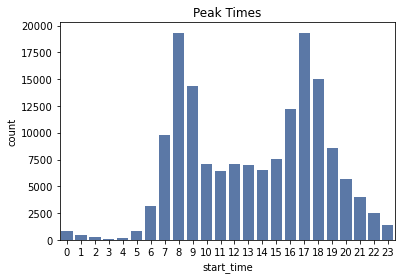

In [27]:
sb.countplot(data = df, x = df.start_time.dt.hour, color =(0.31,0.46,0.7));
plt.title("Peak Times");

looks life we are dealing peak times on 7-9 am and on 5 pm .. probably its the go to work and return times

### Bivariante Exploration

#### Who're the most subscribers?

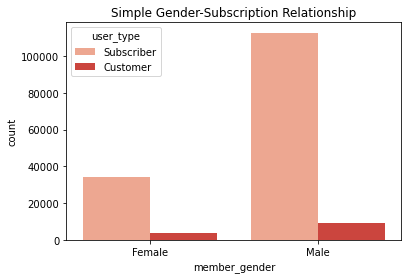

In [28]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'Reds');
plt.title('Simple Gender-Subscription Relationship');

Since most bikesharers are males so it was expected to see most subscribers as males as we see in this plot

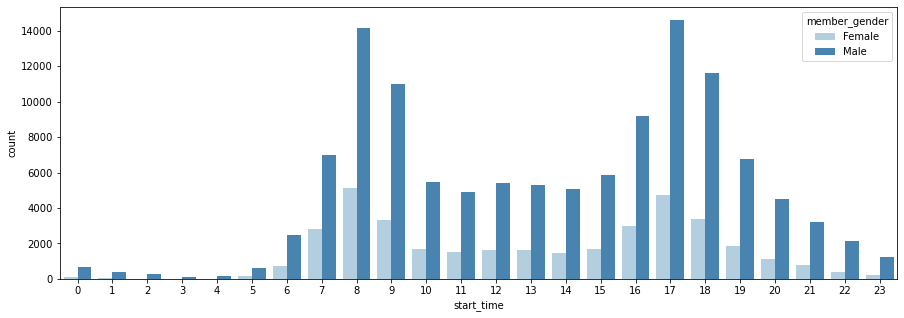

In [29]:
plt.figure(figsize=(15,5))
sb.countplot(data = df, x = df.start_time.dt.hour , hue = 'member_gender', palette = 'Blues');

As we can see up here, there is no difference between both males and females peak sharing times

#### Is bikeshare over all trip affected by duration?

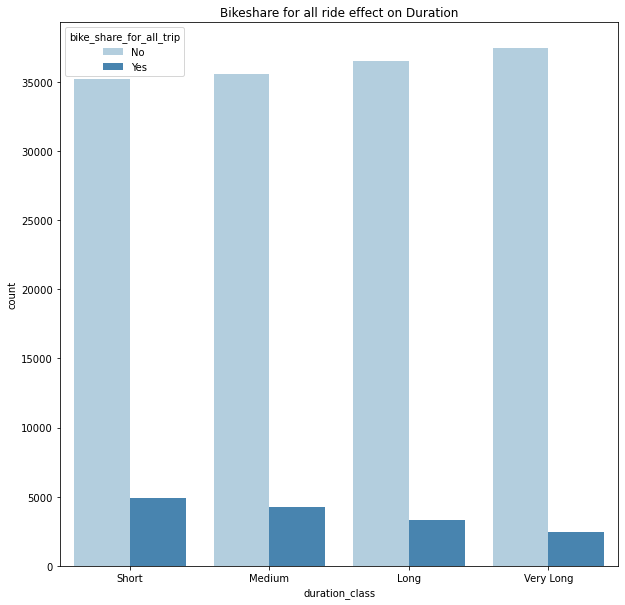

In [30]:
plt.figure(figsize=(10,10))
plt.title('Bikeshare for all ride effect on Duration')
sb.countplot(data = df, x = df.duration_class , hue = 'bike_share_for_all_trip', palette = 'Blues');

Looks like Duration affects bikeshare as duration increases the bikeshare tend not to be used the whole trip while duration decreases the probability of using bikeshare for whole trip increases 

#### Is age a factor affecting share duration?

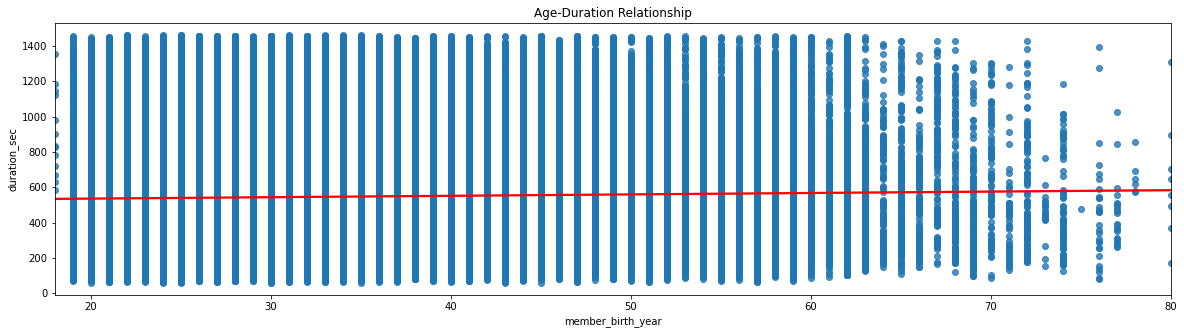

In [31]:
plt.figure(figsize=(20,5));
plt.title("Age-Duration Relationship");
sb.regplot(data=df, x=df.member_birth_year, y=df.duration_sec, line_kws={'color':'r'});

So here it appears like there's a very weak relation between age and duration as so duration don't usually increase as age increases

### Multivariante Exploration

#### Are subscriptions affected by either of gender or age?
#### Is there any factor that affects a Simpson-Paradox throughout these times?!!

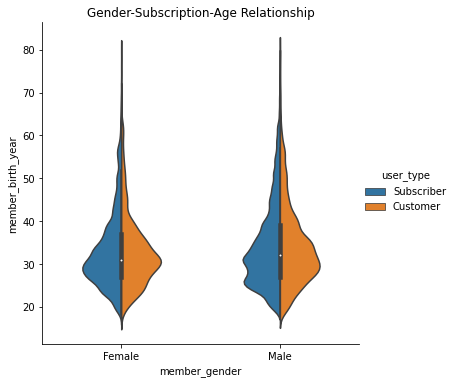

In [32]:
sb.catplot(x="member_gender", y="member_birth_year",
                hue="user_type",
                data=df, kind="violin", split=True, width = 0.5);
plt.title('Gender-Subscription-Age Relationship');

As we can see here, though most bikeshare users are of the males and most of them too are at the age of 30, but most subscribers of age 30 are females not males which could cause a simpson paradox if it wasn't explored to see it distributed

#### What ages affect bikeshare for all trip?

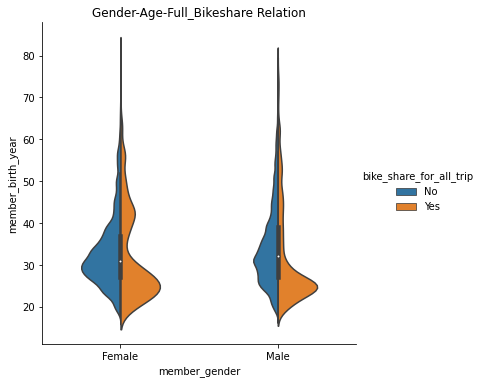

In [33]:
sb.catplot(x="member_gender", y="member_birth_year",
                hue="bike_share_for_all_trip",
                data=df, kind="violin", split=True, width = 0.5);
plt.title("Gender-Age-Full_Bikeshare Relation");

Also we can see here that most bike sharers under 30 are the most to use bikeshare for their whole trip whilest over thirties till 50 tend to not use it for their whole trip 

#### what conditions are affected by subscription?

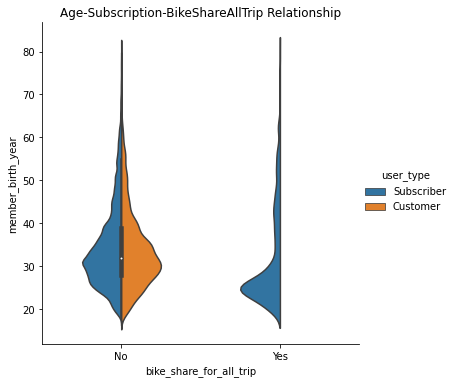

In [34]:
sb.catplot(x="bike_share_for_all_trip", y="member_birth_year",
                hue="user_type",
                data=df, kind="violin", split=True, width = 0.5);
plt.title('Age-Subscription-BikeShareAllTrip Relationship');

As noticed here bikeshare over all trip is affected by subscription

This also answers another question:
#### Why some users may not use bikeshare for their whole trip?
Looks like the subscription status is a reason for not using bike share for the whole trip besides age

## Observation Summary
1. Most crowded stations are San Francisco Caltrain Station 2 and Market St
2. Most trips go around Berry St 4th and Harry Bridges Plaza
3. Most Bikesharers are of age 30
4. Peak times are on morning go to work and afternoon return
5. Most Bikesharers are males
6. Age doesn't affect share duration
6. Although most bikesharers are males and most bikesharers are of age 30 but females are the most subscribers of age 30
7. Simpson's paradox could happen assuming that most bikesharers of age 30 males are subscribers while its inversed here
7. Since most bikesharers are males so it's expected to see most subscribers as males as we see in the dataset
8. Bikeshare for all trip is affected by subscription
9. Most bike sharers under 30 are the most to use bikeshare for their whole trip
10. Age doesn't really affect share duration 
11. Duration affects bikeshare over trip